In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

# https://docs.scipy.org/doc/scipy/reference/stats.html

## Экспоненциальное распределение

In [80]:
# Задаем экспоненциальное распределение с параметром lambda=1.5
pLambda = 1.5
expon_rv = sts.expon(scale=1/pLambda)

Text(0.5,0,'$x$')

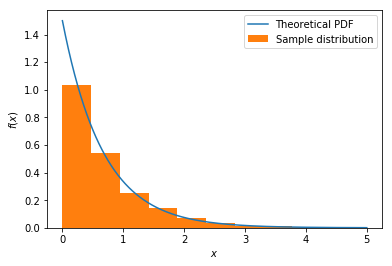

In [81]:
# Генерация выборки из распределения, отрисовка гистограммы выборки и теоретической плотности.
sample = expon_rv.rvs(size=1000)

x = np.linspace(0, 5, 500)
expon_pdf = expon_rv.pdf(x)
plt.plot(x, expon_pdf, label='Theoretical PDF')
plt.hist(sample, density=True, label='Sample distribution')

plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [122]:
# Функция, которая рисует гистограмму распределений выборочных средних и строит график плотности нормального распределения
def result_plot(sample_means_list, norm_approx_mean, norm_approx_sigma):
    norm_rv = sts.norm(loc=norm_approx_mean, scale=norm_approx_sigma)
    x = np.linspace(0, 2, 500)
    norm_pdf = norm_rv.pdf(x)
    plt.plot(x, norm_pdf, label='Normal PDF approximation')

    plt.hist(sample_means_list, bins=20, density=True, label='Sample means distribution');

    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

In [84]:
# Число генерируемых выборок
num_of_samples = 1000

# Теоретические мат. ожидание и дисперсия экспоненциального распределения
expon_theor_mean = pow(pLambda, -1)
expon_theor_var = pow(pLambda, -2)

Sample mean: 0.6632165090044175
Sample standard deviation: 0.2951327641196928
Normal distribution - mean: 0.666666666667
Normal distribution - standard deviation: 0.298142397


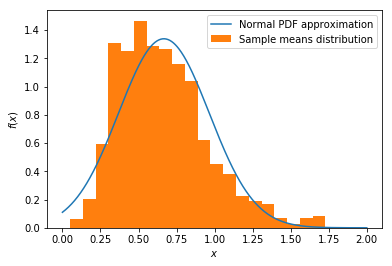

In [126]:
# Генерируем выборки объема 5, вычисляем параметры соответствующего нормального распределения, строим графики.
sample_size = 5

sample_means_list = [(expon_rv.rvs(size=sample_size)).mean() for i in range(num_of_samples)]
sample_means_list = np.array(sample_means_list)

# Параметры нормального распределения
norm_approx_mean = expon_theor_mean
norm_approx_sigma = math.sqrt(expon_theor_var / sample_size)

result_plot(sample_means_list, norm_approx_mean, norm_approx_sigma)

expon_sample_mean = sample_means_list.mean()
expon_sample_std = sample_means_list.std()
print('Sample mean: ' + str(expon_sample_mean))
print('Sample standard deviation: ' + str(expon_sample_std))

print('Normal distribution - mean: ' + str(norm_approx_mean))
print('Normal distribution - standard deviation: ' + str(norm_approx_sigma))

Sample mean: 0.6584212112833265
Sample standard deviation: 0.14444702390245082
Normal distribution - mean: 0.666666666667
Normal distribution - standard deviation: 0.1490711985


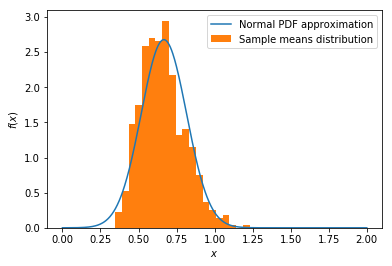

In [133]:
# Генерируем выборки объема 20, вычисляем параметры соответствующего нормального распределения, строим графики.
sample_size = 20

sample_means_list = [(expon_rv.rvs(size=sample_size)).mean() for i in range(num_of_samples)]
sample_means_list = np.array(sample_means_list)

# Параметры нормального распределения
norm_approx_mean = expon_theor_mean
norm_approx_sigma = math.sqrt(expon_theor_var / sample_size)

result_plot(sample_means_list, norm_approx_mean, norm_approx_sigma)

expon_sample_mean = sample_means_list.mean()
expon_sample_std = sample_means_list.std()
print('Sample mean: ' + str(expon_sample_mean))
print('Sample standard deviation: ' + str(expon_sample_std))

print('Normal distribution - mean: ' + str(norm_approx_mean))
print('Normal distribution - standard deviation: ' + str(norm_approx_sigma))

Sample mean: 0.6646212678007032
Sample standard deviation: 0.0812763402302652
Normal distribution - mean: 0.666666666667
Normal distribution - standard deviation: 0.079681907289


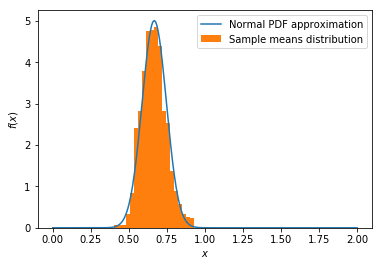

In [129]:
# Генерируем выборки объема 70, вычисляем параметры соответствующего нормального распределения, строим графики.
sample_size = 70

sample_means_list = [(expon_rv.rvs(size=sample_size)).mean() for i in range(num_of_samples)]
sample_means_list = np.array(sample_means_list)

norm_approx_mean = expon_theor_mean
norm_approx_sigma = math.sqrt(expon_theor_var / sample_size)

result_plot(sample_means_list, norm_approx_mean, norm_approx_sigma)

expon_sample_mean = sample_means_list.mean()
expon_sample_std = sample_means_list.std()
print('Sample mean: ' + str(expon_sample_mean))
print('Sample standard deviation: ' + str(expon_sample_std))

print('Normal distribution - mean: ' + str(norm_approx_mean))
print('Normal distribution - standard deviation: ' + str(norm_approx_sigma))

## Выводы

При n=5 наблюдаем смещение влево гистограммы распределения выборочных средних относительно графика плотности нормального распределения. Это связано с тем, что график теоретической плотности экспоненциального распределения несимметричный, случайная величина чаще принимает значения, близкие к нулю.

С ростом n замечаем, что выборочные средние все больше и больше концентрируются вокруг среднего значения нормального распределения, точность возрастает, дисперсия убывает.